# ДЗ

1) Попытаться ответить на вопросы/выдвинуть гипотезы

2) Доделать прошлые домашния задания

3) Прочитать статьи BM25/MatrixFactorization

## Практика:

4) Поэкспериментировать с ALS (grid-search)

# Production

Начиная с этого вебинара, мы будем строить *базовое решение* для системы рекомендаций топ-N товаров. В финальном проекте вам нужно будет его сущесвтенно улучшить.  
  
**Ситуация**: Вы работает data scientist в крупном продуктовом российском ритейлере. Ваш конкурент сделал рекомендательную систему, и его продажи выросли. Ваш менеджмент тоже хочет увеличить продажи   
**Задача со слов менеджера**: Сделайте рекомендательную систему топ-10 товаров для рассылки по e-mail

**Ожидание:**
- Отправляем e-mail с топ-10 товарами, отсортированными по вероятности

**Реальность:**
- Чего хочет менеджер от рекомендательной системы?
    - (рост показателя X на Y% за Z недель)
- По-хорошему надо бы предварительно посчитать потенциальный эффект от рекоммендательной системы 
    - (Оценки эффектов у менеджера и у вас могут сильно не совпадать: как правило, вы знаете про данные больше)
- А у нас вообще есть e-mail-ы пользователей? Для скольки %? Не устарели ли они?
    - (Проверить количество указаных e-mail-ов пользователей, взять случайным образов выборку из этого набора, подтверждение e-mail почты для проверки)
- Будем ли использовать СМС и push-уведомления в приложении? Может, будем печатать рекомендации на чеке после оплаты на кассе?
    - (посчитать цену на операционные рассходы СМС и push-уведомлений и расходы на печати на чеке. Сопоставить проходимость магазинов и пользователей приложения. На чеках необходимо печатать всегда, а в смс и приложении в зависимости от задач)
- Как будет выглядеть e-mail? (решаем задачу топ-10 рекомендаций или ранжирования? И топ-10 ли?)
    - Зависит от корпоративного дизайна компании, приложения и т.д. Топ-10 это уже много в случае большого количества мало людей будут доходить до  конца списка, в случае пачети на чеках, чеки будут длинные и та же ситуация с прочтение как и в приложениях.
- Какие товары должны быть в e-mail? Есть ли какие-то ограничения (только акции и т п)?
    - Товары которые покупают каждый день нет необходимости рекомендовать. Необходимы рекомендации которые принесут выгоду
- Сколько денег мы готовы потратить на привлечение 1 юзера? CAC - Customer Aquisition Cost. 
    - Обычно CAC = расходы на коммуникацию + расходы на скидки
- Cколько мы хотим зарабатывать с одного привлеченного юзера?
    - Чем больше чем лучшею. С одного привлеченного юзера - хотелось бы заработать чек пользователя нашего продукта(в случае ритейла: средний чек) 
---
- А точно нужно сортировать по вероятности?
    - Вероятность можно интерпретировать, больше меньше на основе ккого то количества признаков.
- Какую метрику использовать?
    - Зависит от задачи: money_precision_at_k, precision_at_k, money_recall_at_k, recall_at_k.
- Сколько раз в неделю отпрпавляем рассылку?
    - 1 раз в неделю(пятница или понедельник) будет хорошим вариантом(пятница перед выходными, а понедельник после выходных - для формирования списка покупок на следующие выходные). В выходные проходимость магазинов очень сильно возрастает. Можно было бы проверить гипотезу о том что покупки составляют за долго до закупок но принесет ли это выгоды необходимо смотреть.
- В какое время отправляем рассылку?
    - В вечернее время около 20:00(для получения сообщений не во время рабочго дня или при возвращении домой)
- Будем отправлять одному юзеру много раз наши рекоммендации. Как добиться того, чтобы они хоть немного отличались?
    - Чередовать рекомендации похожих юзеров(или из рекомендаций 5-и похожих юзеров рандомом выбирать 10 рекомендаций).Ввести ранжирование по похожести товаров и сделать 10 рекомендаций для разных товаров(при наличии категорий рекомендовать из разных категорий)
- Нужно ли, чтобы в одной рассылке были *разные* товары? Как определить, что товары *разные*? Как добиться того, чтобы они были разными?
    - Исходя из похожести товаров, определить порог непохожести и по нему смотерть(опять же при наличии категорий товаров и разного ценового сегмента находить разные)
- И многое другое:)

**В итоге договорились, что:**
- Хотим повысить выручку минимум на 6% за 4 месяца. Будем повышать за счет роста Retention минимум на  3% и среднего чека минимум на 3%
- Топ-5 товаров, а не топ-10 (В e-mail 10 выглядят не красиво, в push и на чек больше 5 не влезает)
- Рассылаем в e-mail (5% клиентов) и push-уведомлении (20% клиентов), печатаем на чеке (все оффлайн клиенты)
- **3 товара с акцией** (Как это учесть? А если на товар была акция 10%, а потом 50%, что будет стоять в user-item матрице?)
- **1 новый товар** (юзер никогда не покупал. Просто фильтруем аутпут ALS? А если у таких товаров очень маленькая вероятность покупки? Может, использовать другую логику/модель?) 
- **1 товар для роста среднего чека** (товары минимум дороже чем обычно покупает юзер. Как это измерить? На сколько дороже?)

Вопросов стало еще больше. Поэтому сначала делаем **MVP** (Minimum viable product) на e-mail. Показываем его менеджеру, измеряем метрики на юзерах. По фидбеку и метрикам делаем улучшения MVP и раскатываем его на push-уведомления и чеки

*Data Science проект* - итеративный процесс!

### 1. Базовое применение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Для работы с матрицами
from scipy.sparse import csr_matrix

# Матричная факторизация
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import bm25_weight, tfidf_weight

# Функции из 1-ого вебинара
import os, sys

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from metrics import precision_at_k, recall_at_k

In [2]:
data = pd.read_csv('../data/retail_train.csv')

data.columns = [col.lower() for col in data.columns]
data.rename(columns={'household_key': 'user_id',
                    'product_id': 'item_id'},
           inplace=True)


test_size_weeks = 3

data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

data_train.head(3)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0


In [3]:
item_features = pd.read_csv('../data/product.csv')
item_features.columns = [col.lower() for col in item_features.columns]
item_features.rename(columns={'product_id': 'item_id'}, inplace=True)

item_features.head(2)

,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,


In [4]:
item_features.department.unique()

array(['GROCERY', 'MISC. TRANS.', 'PASTRY', 'DRUG GM', 'MEAT-PCKGD',
       'SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI', 'COSMETICS',
       'MEAT', 'FLORAL', 'TRAVEL & LEISUR', 'SEAFOOD', 'MISC SALES TRAN',
       'SALAD BAR', 'KIOSK-GAS', 'ELECT &PLUMBING', 'GRO BAKERY',
       'GM MERCH EXP', 'FROZEN GROCERY', 'COUP/STR & MFG', 'SPIRITS',
       'GARDEN CENTER', 'TOYS', 'CHARITABLE CONT', 'RESTAURANT', 'RX',
       'PROD-WHS SALES', 'MEAT-WHSE', 'DAIRY DELI', 'CHEF SHOPPE', 'HBC',
       'DELI/SNACK BAR', 'PORK', 'AUTOMOTIVE', 'VIDEO RENTAL', ' ',
       'CNTRL/STORE SUP', 'HOUSEWARES', 'POSTAL CENTER', 'PHOTO', 'VIDEO',
       'PHARMACY SUPPLY'], dtype=object)

In [5]:
valid_result = data_test.groupby('user_id')['item_id'].unique().reset_index()
valid_result.columns=['user_id', 'actual']
valid_result.head(2)

,user_id,actual
0,1,"[821867, 834484, 856942, 865456, 889248, 90795..."
1,3,"[835476, 851057, 872021, 878302, 879948, 90963..."


In [6]:
train_result = data_train.groupby('user_id')['item_id'].unique().reset_index()
train_result.columns=['user_id', 'actual']
train_result.head(2)

,user_id,actual
0,1,"[825123, 831447, 840361, 845307, 852014, 85498..."
1,2,"[854852, 930118, 1077555, 1098066, 5567388, 55..."


In [7]:
popularity = data_train.groupby('item_id')['quantity'].sum().reset_index()
popularity.rename(columns={'quantity': 'n_sold'}, inplace=True)

top_5000 = popularity.sort_values('n_sold', ascending=False).head(5000).item_id.tolist()

In [8]:
data_train.head(5)

,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [9]:
# Заведем фиктивный item_id

data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999999

user_item_matrix = pd.pivot_table(data_train, 
                                  index='user_id', columns='item_id', 
                                  values='quantity', # Можно пробоват ьдругие варианты
                                  aggfunc='count', 
                                  fill_value=0
                                 )

user_item_matrix = user_item_matrix.astype(float) # необходимый тип матрицы для implicit

# переведем в формат saprse matrix
sparse_user_item = csr_matrix(user_item_matrix)

user_item_matrix.head(3)

/home/oleg_rev/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

# ALS

In [11]:
%%time

model = AlternatingLeastSquares(factors=100, 
                                regularization=0.001,
                                iterations=15, 
                                calculate_training_loss=True, 
                                num_threads=4)

model.fit(csr_matrix(user_item_matrix).T,  # На вход item-user matrix
          show_progress=True)

recs = model.recommend(userid=userid_to_id[2],  # userid - id от 0 до N
                        user_items=csr_matrix(user_item_matrix).tocsr(),   # на вход user-item matrix
                        N=5, # кол-во рекомендаций 
                        filter_already_liked_items=False, 
                        filter_items=None, 
                        recalculate_user=True)

  0%|          | 0/15 [00:00<?, ?it/s]

CPU times: user 18.7 s, sys: 64.8 ms, total: 18.7 s
Wall time: 5.3 s


In [12]:
# csr_matrix(user_item_matrix).T

In [13]:
# csr_matrix(user_item_matrix).T.tocsr()

In [14]:
def get_recommendations(user, model, N=5):
    res = [id_to_itemid[rec[0]] for rec in 
                    model.recommend(userid=userid_to_id[user], 
                                    user_items=sparse_user_item,   # на вход user-item matrix
                                    N=N, 
                                    filter_already_liked_items=False, 
                                    filter_items=None, 
                                    recalculate_user=True)]
    return res

In [15]:
%%time
    
train_result['als'] = train_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
train_result.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()

CPU times: user 24.8 s, sys: 19.7 ms, total: 24.8 s
Wall time: 24.7 s


0.7401360544217546

In [16]:
%%time
    
valid_result['als'] = valid_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
valid_result.apply(lambda row: precision_at_k(row['als'], row['actual']), axis=1).mean()

CPU times: user 24.2 s, sys: 3.82 ms, total: 24.2 s
Wall time: 24.2 s


0.16336924583741205

In [17]:
valid_result.head(2)

,user_id,actual,als
0,1,"[821867, 834484, 856942, 865456, 889248, 90795...","[5569374, 995242, 1033142, 979707, 1029743]"
1,3,"[835476, 851057, 872021, 878302, 879948, 90963...","[1106523, 910032, 1133018, 1022003, 938700]"


### Подбор гиперпараметров

In [18]:
lambda_regs = [0.01/(10**i) for i in range(4)]
lambda_regs

[0.01, 0.001, 0.0001, 1e-05]

In [19]:
n_factors =  [round(200/(2**i)) for i in range(5)]
n_factors

[200, 100, 50, 25, 12]

In [20]:
from time import time

In [21]:
hyperparam_result={
    'lambda_regularizations':[],
    'n_factors':[],
    'fit_time':[],
    'train_precision':[],
    'valid_precision':[]
}


first_time = time()
i=0
for lambda_reg in lambda_regs:
    for n_factor in n_factors:
        hyperparam_result['lambda_regularizations'].append(lambda_reg)
        hyperparam_result['n_factors'].append(n_factor)

        start_time = time()
        
        model = AlternatingLeastSquares(factors=n_factor, #k
                                regularization=lambda_reg,
                                iterations=15, 
                                calculate_training_loss=True, 
                                num_threads=4)        
        model.fit(csr_matrix(user_item_matrix).T.tocsr(), show_progress=False)
        
        end_time = time()
        
        hyperparam_result['fit_time'].append(end_time-start_time)
        res_name = f'ALS: lambda_regularizations {lambda_reg}, n_factors: {n_factor}'
        
        train_result[res_name] = train_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
        train_precision = train_result.apply(lambda row: precision_at_k(row[res_name], row['actual']), axis=1).mean()
                
        hyperparam_result['train_precision'].append(train_precision)

        valid_result[res_name] = valid_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
        valid_precision = valid_result.apply(lambda row: precision_at_k(row[res_name], row['actual']), axis=1).mean()
        
        hyperparam_result['valid_precision'].append(valid_precision)
        
        cycle_time = time()
        i+=1
        print(f'Цикл {i} из 20, времени прошло {(cycle_time-first_time):.2f}')



Цикл 1 из 20, времени прошло 110.10
Цикл 2 из 20, времени прошло 165.91
Цикл 3 из 20, времени прошло 201.02
Цикл 4 из 20, времени прошло 231.33
Цикл 5 из 20, времени прошло 256.07
Цикл 6 из 20, времени прошло 359.69
Цикл 7 из 20, времени прошло 406.62
Цикл 8 из 20, времени прошло 438.34
Цикл 9 из 20, времени прошло 465.81
Цикл 10 из 20, времени прошло 490.44
Цикл 11 из 20, времени прошло 594.14
Цикл 12 из 20, времени прошло 640.88
Цикл 13 из 20, времени прошло 672.95
Цикл 14 из 20, времени прошло 700.59
Цикл 15 из 20, времени прошло 725.37
Цикл 16 из 20, времени прошло 828.52
Цикл 17 из 20, времени прошло 876.11
Цикл 18 из 20, времени прошло 908.21
Цикл 19 из 20, времени прошло 935.69
Цикл 20 из 20, времени прошло 960.68


In [22]:
hyperparam_result_ = hyperparam_result
hyperparam_result

{'lambda_regularizations': [0.01,
  0.01,
  0.01,
  0.01,
  0.01,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  1e-05,
  1e-05,
  1e-05,
  1e-05,
  1e-05],
 'n_factors': [200,
  100,
  50,
  25,
  12,
  200,
  100,
  50,
  25,
  12,
  200,
  100,
  50,
  25,
  12,
  200,
  100,
  50,
  25,
  12],
 'fit_time': [5.750643968582153,
  3.525240421295166,
  4.742176055908203,
  3.1373608112335205,
  2.956955671310425,
  5.3724284172058105,
  3.2499449253082275,
  3.6431872844696045,
  3.06219220161438,
  2.7706491947174072,
  5.406278371810913,
  3.2417328357696533,
  3.747959852218628,
  3.2255170345306396,
  2.850040912628174,
  5.316370487213135,
  3.2170450687408447,
  3.6456491947174072,
  3.088578224182129,
  2.95731258392334],
 'train_precision': [0.8273709483793364,
  0.7295718287314797,
  0.6262505002000729,
  0.5710284113645416,
  0.5321328531412534,
  0.8280912364945824,
  0.7410964385754155,
  0.6323329331732626,
  0.570708283313

In [23]:
hyperparam_result = pd.DataFrame(hyperparam_result)
hyperparam_result


,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
0,0.01000,200,5.750644,0.827371,0.137218
1,0.01000,100,3.525240,0.729572,0.167875
2,0.01000,50,4.742176,0.626251,0.165622
3,0.01000,25,3.137361,0.571028,0.168168
4,0.01000,12,2.956956,0.532133,0.168364
5,0.00100,200,5.372428,0.828091,0.132223
6,0.00100,100,3.249945,0.741096,0.159941
7,0.00100,50,3.643187,0.632333,0.165230
8,0.00100,25,3.062192,0.570708,0.161410
9,0.00100,12,2.770649,0.534854,0.165720


In [24]:
hyperparam_result.loc[hyperparam_result['n_factors']==12]

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
4,0.01000,12,2.956956,0.532133,0.168364
9,0.00100,12,2.770649,0.534854,0.165720
14,0.00010,12,2.850041,0.530132,0.166210
19,0.00001,12,2.957313,0.535894,0.166895


In [25]:
hyperparam_result.loc[hyperparam_result['lambda_regularizations']==0.01]

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
0,0.01,200,5.750644,0.827371,0.137218
1,0.01,100,3.525240,0.729572,0.167875
2,0.01,50,4.742176,0.626251,0.165622
3,0.01,25,3.137361,0.571028,0.168168
4,0.01,12,2.956956,0.532133,0.168364


In [52]:
def show_precision_on_hyper_params(hyperparam_result, precision_on_data = 'train_precision'):
    n_factors = hyperparam_result['n_factors'].unique()
    lambda_regularizations = hyperparam_result['lambda_regularizations'].unique() 
    for n_factor in n_factors:
        plt.plot(lambda_regularizations, hyperparam_result.loc[hyperparam_result['n_factors']==n_factor,f'{precision_on_data}'], label = f'n_factor = {n_factor}')
    plt.legend()
    plt.xlabel('lambda_regularizations')
    plt.ylabel('precision@k')
    plt.title(f'Качество({precision_on_data}) от гиперпараметра lambda_regularizations')
    plt.show()
    
    for lambda_reg in lambda_regularizations:
        plt.plot(n_factors,hyperparam_result.loc[hyperparam_result['lambda_regularizations']==lambda_reg,f'{precision_on_data}'], label = f'lambda_reg = {lambda_reg}')
    plt.legend()
    plt.xlabel('n_factors')
    plt.ylabel('precision@k')
    plt.title(f'Качество({precision_on_data}) от гиперпараметра n_factors')
    plt.show()
    
    

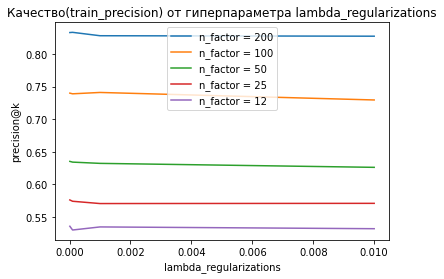

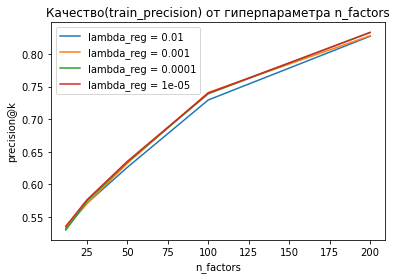

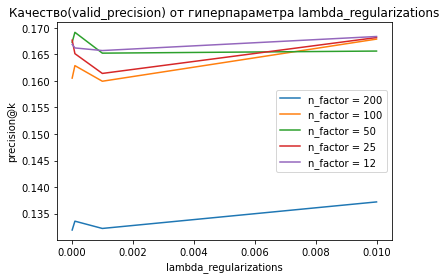

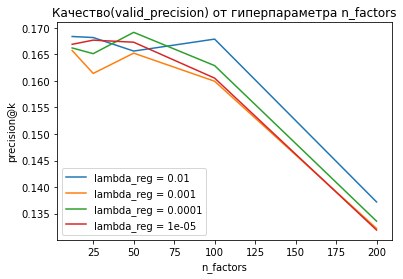

In [53]:
show_precision_on_hyper_params(hyperparam_result)
show_precision_on_hyper_params(hyperparam_result, precision_on_data='valid_precision')

Метрики для valid_precision 
    
    при n_factors==100 наблюдается провал в сторону увелечения "n_factors" 
    и колебания в сторону уменьшения "n_factors"

Менее выраженная зависимость от увеличения lambda_regularizations,

    при параметрах n_factors = [12, 25, 100] наблюдается небольший рост,
    n_factors = 50 после lambda_regularizations=0.001 идет неизменное качество,
    n_factors = 200 явное ухудшение качества

#### Обобщающее заключение для valid данных:

    Качество ростет при увеличении праметра lambda_regularizations,
    и при уменьшениии параметра n_factors

Стабильный рост точности на трейне(train_precision) при увеличении n_factors.

    Это вызвано эффектом переобучения - большое количество латентных факторов позволет максимально точно настроиться под каждый item и user на трейне, как следствие пропадает обощающая способность

#### Обобщающее заключение для train данных:

    Качество ростет при увеличении параметра n_factors и lambda_regularizations(переобучение),
    параметр регуляризации не влияет на качество

In [28]:
lambda_regs_0 = [1/(10**i) for i in range(4)]
lambda_regs_0

[1.0, 0.1, 0.01, 0.001]

In [29]:
n_factors_0 =  [round(12/(2**i)) for i in range(5)]
n_factors_0

[12, 6, 3, 2, 1]

In [30]:
hyperparam_result_0={
    'lambda_regularizations':[],
    'n_factors':[],
    'fit_time':[],
    'train_precision':[],
    'valid_precision':[]
}


first_time = time()
i=0
for lambda_reg in lambda_regs_0:
    for n_factor in n_factors_0:
        hyperparam_result_0['lambda_regularizations'].append(lambda_reg)
        hyperparam_result_0['n_factors'].append(n_factor)

        start_time = time()
        
        model = AlternatingLeastSquares(factors=n_factor, #k
                                regularization=lambda_reg,
                                iterations=15, 
                                calculate_training_loss=True, 
                                num_threads=4)        
        model.fit(csr_matrix(user_item_matrix).T.tocsr(), show_progress=False)
        
        end_time = time()
        
        hyperparam_result_0['fit_time'].append(end_time-start_time)
        res_name = f'ALS: lambda_regularizations {lambda_reg}, n_factors: {n_factor}'
        
        train_result[res_name] = train_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
        train_precision = train_result.apply(lambda row: precision_at_k(row[res_name], row['actual']), axis=1).mean()
                
        hyperparam_result_0['train_precision'].append(train_precision)

        valid_result[res_name] = valid_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
        valid_precision = valid_result.apply(lambda row: precision_at_k(row[res_name], row['actual']), axis=1).mean()
        
        hyperparam_result_0['valid_precision'].append(valid_precision)
        
        cycle_time = time()
        i+=1
        print(f'Цикл {i} из 20, времени прошло {(cycle_time-first_time):.2f}')



Цикл 1 из 20, времени прошло 24.63
Цикл 2 из 20, времени прошло 52.11
Цикл 3 из 20, времени прошло 77.43
Цикл 4 из 20, времени прошло 101.19
Цикл 5 из 20, времени прошло 122.40
Цикл 6 из 20, времени прошло 146.70
Цикл 7 из 20, времени прошло 170.62
Цикл 8 из 20, времени прошло 194.40
Цикл 9 из 20, времени прошло 224.35
Цикл 10 из 20, времени прошло 247.86
Цикл 11 из 20, времени прошло 272.17
Цикл 12 из 20, времени прошло 296.28
Цикл 13 из 20, времени прошло 320.00
Цикл 14 из 20, времени прошло 343.52
Цикл 15 из 20, времени прошло 364.93
Цикл 16 из 20, времени прошло 389.17
Цикл 17 из 20, времени прошло 413.21
Цикл 18 из 20, времени прошло 437.13
Цикл 19 из 20, времени прошло 460.72
Цикл 20 из 20, времени прошло 485.51


In [31]:
hyperparam_result_0 = pd.DataFrame(hyperparam_result_0)
hyperparam_result_0

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
0,1.000,12,2.812374,0.535414,0.169148
1,1.000,6,3.239204,0.516847,0.171499
2,1.000,3,2.879994,0.501481,0.169931
3,1.000,2,2.988653,0.495558,0.170225
4,1.000,1,1.767605,0.499400,0.169931
5,0.100,12,2.505069,0.528852,0.166895
6,0.100,6,2.680243,0.515326,0.170421
7,0.100,3,2.701472,0.501321,0.169148
8,0.100,2,3.041260,0.494438,0.171499
9,0.100,1,2.332969,0.499400,0.169931


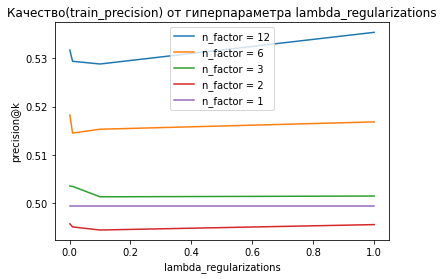

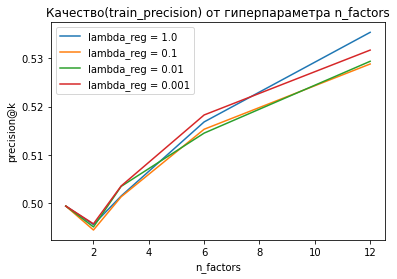

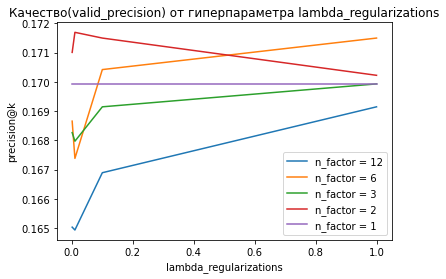

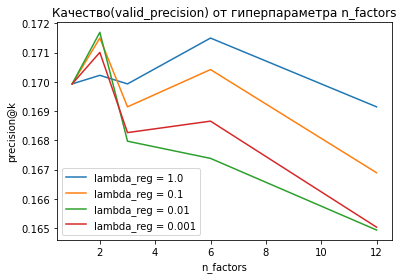

In [54]:
show_precision_on_hyper_params(hyperparam_result_0)
show_precision_on_hyper_params(hyperparam_result_0, precision_on_data='valid_precision')

#### Обобщающее заключение для valid данных после рассмотрения дополнительных параметров:

    Качество наивысшее при параметрах n_factors=2(l_reg=0.01) и n_factors=6(l_reg=1.0)
    Качество имеет восходящий тренд при параметрах n_factors=[3, 6, 12],
        не изменяется при n_factors=1,
        падает при n_factors=2

#### Обобщающее заключение для train данных:

    Качество ростет при увеличении параметра n_factors (переобучение),
    имеется провал при n_factors=2 
    параметр регуляризации слабо влияет на качество 

In [33]:
hyperparam_result.sort_values('fit_time', ascending=False)

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
0,0.01000,200,5.750644,0.827371,0.137218
10,0.00010,200,5.406278,0.833293,0.133595
5,0.00100,200,5.372428,0.828091,0.132223
15,0.00001,200,5.316370,0.832973,0.131929
2,0.01000,50,4.742176,0.626251,0.165622
12,0.00010,50,3.747960,0.634254,0.169148
17,0.00001,50,3.645649,0.635374,0.167287
7,0.00100,50,3.643187,0.632333,0.165230
1,0.01000,100,3.525240,0.729572,0.167875
6,0.00100,100,3.249945,0.741096,0.159941


По времени зависимость видна из таблицы основной вклад вносит параметр n_factors, что кажеться естественным

In [34]:
hyperparam_result_0.sort_values('fit_time', ascending=False)

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
1,1.000,6,3.239204,0.516847,0.171499
8,0.100,2,3.041260,0.494438,0.171499
3,1.000,2,2.988653,0.495558,0.170225
2,1.000,3,2.879994,0.501481,0.169931
0,1.000,12,2.812374,0.535414,0.169148
17,0.001,3,2.808894,0.503561,0.168266
11,0.010,6,2.806980,0.514526,0.167385
16,0.001,6,2.733753,0.518287,0.168658
18,0.001,2,2.732523,0.495718,0.171009
7,0.100,3,2.701472,0.501321,0.169148


при малых значениях n_factors зависимость слабо прослеживается

In [35]:
n_factors_1 =  [200, 300, 400, 500, 600]
lambda_regs_1 = [0.01]
hyperparam_result_1={
    'lambda_regularizations':[],
    'n_factors':[],
    'fit_time':[],
    'train_precision':[],
    'valid_precision':[]
}


first_time = time()
i=0
for lambda_reg in lambda_regs_1:
    for n_factor in n_factors_1:
        hyperparam_result_1['lambda_regularizations'].append(lambda_reg)
        hyperparam_result_1['n_factors'].append(n_factor)

        start_time = time()
        
        model = AlternatingLeastSquares(factors=n_factor, #k
                                regularization=lambda_reg,
                                iterations=15, 
                                calculate_training_loss=True, 
                                num_threads=4)        
        model.fit(csr_matrix(user_item_matrix).T.tocsr(), show_progress=False)
        
        end_time = time()
        
        hyperparam_result_1['fit_time'].append(end_time-start_time)
        res_name = f'ALS: lambda_regularizations {lambda_reg}, n_factors: {n_factor}'
        
        train_result[res_name] = train_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
        train_precision = train_result.apply(lambda row: precision_at_k(row[res_name], row['actual']), axis=1).mean()
                
        hyperparam_result_1['train_precision'].append(train_precision)

        valid_result[res_name] = valid_result['user_id'].apply(lambda x: get_recommendations(x, model=model, N=5))
        valid_precision = valid_result.apply(lambda row: precision_at_k(row[res_name], row['actual']), axis=1).mean()
        
        hyperparam_result_1['valid_precision'].append(valid_precision)
        
        cycle_time = time()
        i+=1
        print(f'Цикл {i} , времени прошло {(cycle_time-first_time):.2f}')



Цикл 1 , времени прошло 106.90
Цикл 2 , времени прошло 292.40
Цикл 3 , времени прошло 577.37
Цикл 4 , времени прошло 1009.58
Цикл 5 , времени прошло 1830.68


In [36]:
hyperparam_result_1_ = hyperparam_result_1
hyperparam_result_1 = pd.DataFrame(hyperparam_result_1)

In [37]:
hyperparam_result_1.sort_values('fit_time', ascending=False)

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
4,0.01,600,20.341969,0.895318,0.095984
3,0.01,500,15.563720,0.886275,0.100588
2,0.01,400,10.974729,0.876351,0.111557
1,0.01,300,7.938588,0.860664,0.122233
0,0.01,200,5.377098,0.823129,0.138394


In [38]:
hyperparam_result_1.sort_values('valid_precision', ascending=False)

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
0,0.01,200,5.377098,0.823129,0.138394
1,0.01,300,7.938588,0.860664,0.122233
2,0.01,400,10.974729,0.876351,0.111557
3,0.01,500,15.563720,0.886275,0.100588
4,0.01,600,20.341969,0.895318,0.095984


#### по данным видно падение качества на тестовой выборке при увеличении n_factors

In [50]:
complete_hyperparameter_results = pd.concat((hyperparam_result,
                                             hyperparam_result_0,
                                             hyperparam_result_1),
                                            ignore_index=True)
complete_hyperparameter_results.sort_values('valid_precision', ascending=False)

,lambda_regularizations,n_factors,fit_time,train_precision,valid_precision
33,0.01000,2,2.686220,0.495078,0.171694
21,1.00000,6,3.239204,0.516847,0.171499
28,0.10000,2,3.041260,0.494438,0.171499
38,0.00100,2,2.732523,0.495718,0.171009
26,0.10000,6,2.680243,0.515326,0.170421
23,1.00000,2,2.988653,0.495558,0.170225
34,0.01000,1,1.778509,0.499400,0.169931
29,0.10000,1,2.332969,0.499400,0.169931
24,1.00000,1,1.767605,0.499400,0.169931
39,0.00100,1,1.784723,0.499400,0.169931
